In [14]:
import wandb
import torch
import numpy as np
from utils.data import create_train_validation_loaders
from SimpleClassifier import SimpleClassifier
from Configuration import Configuration
import matplotlib.pyplot as plt

config = Configuration()    

In [3]:
api = wandb.Api()
artifact = api.artifact("gerovanmi/retina-health-classification/U-NetEncoder:v7")

# NOTE: The artifact currently has to be moved manually
artifact_dir = artifact.download()

wandb: Downloading large artifact U-NetEncoder:v7, 149.05MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.4


In [11]:
model = SimpleClassifier()
model.load_state_dict(torch.load(config.PROJECT_DIR.joinpath("models/U-NetEncoder_1715874887.pt"), map_location="cpu"))

<All keys matched successfully>

In [65]:
def image_grid(imgs, number_of_rows=3, number_of_cols=5, file_name="image.png"):
    """Load and show images in a grid from a list of paths"""
    count = len(imgs)
    figure = plt.figure(figsize=(20, 50))
    for ix, image in enumerate(imgs):
        plt.subplots_adjust(bottom=0.3, right=0.8, top=0.5)
        ax = plt.subplot(number_of_rows, number_of_cols, ix + 1)
        ax.axis('off')
        ax.imshow(image.permute(1, 2, 0))
    figure.savefig(file_name)


In [31]:
_, validation_loader = create_train_validation_loaders(config.DATA_PATH, 20)


incorrect_images = []
correct_images = []

with torch.inference_mode(): 
    for images, labels in validation_loader:
        label = labels[0]
        if label != config.CLASS_INDICES["Glaucoma"]:
            continue
            
        image = images[0]
        predictions = model(images)
        prediction = np.argmax(predictions[0])

        if prediction != label:
            incorrect_images.append(image)

        else:
            correct_images.append(image)


Training data: 3374, Validation data: 843


56


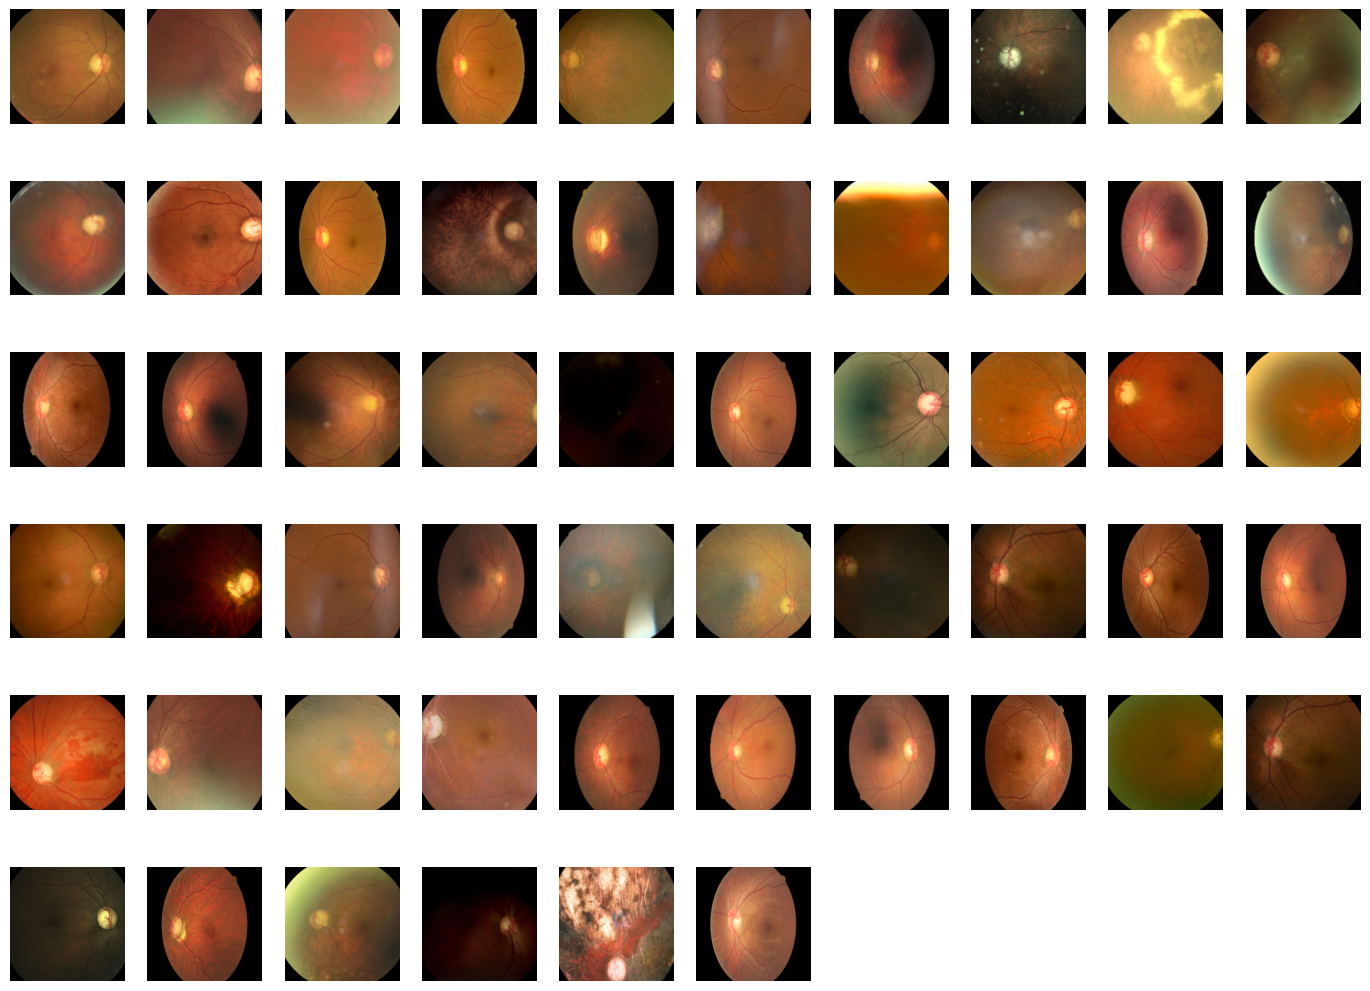

In [67]:
print(len(incorrect_images))
image_grid(incorrect_images, 6, 10, "incorrect.png")

147


ValueError: num must be an integer with 1 <= num <= 60, not 61

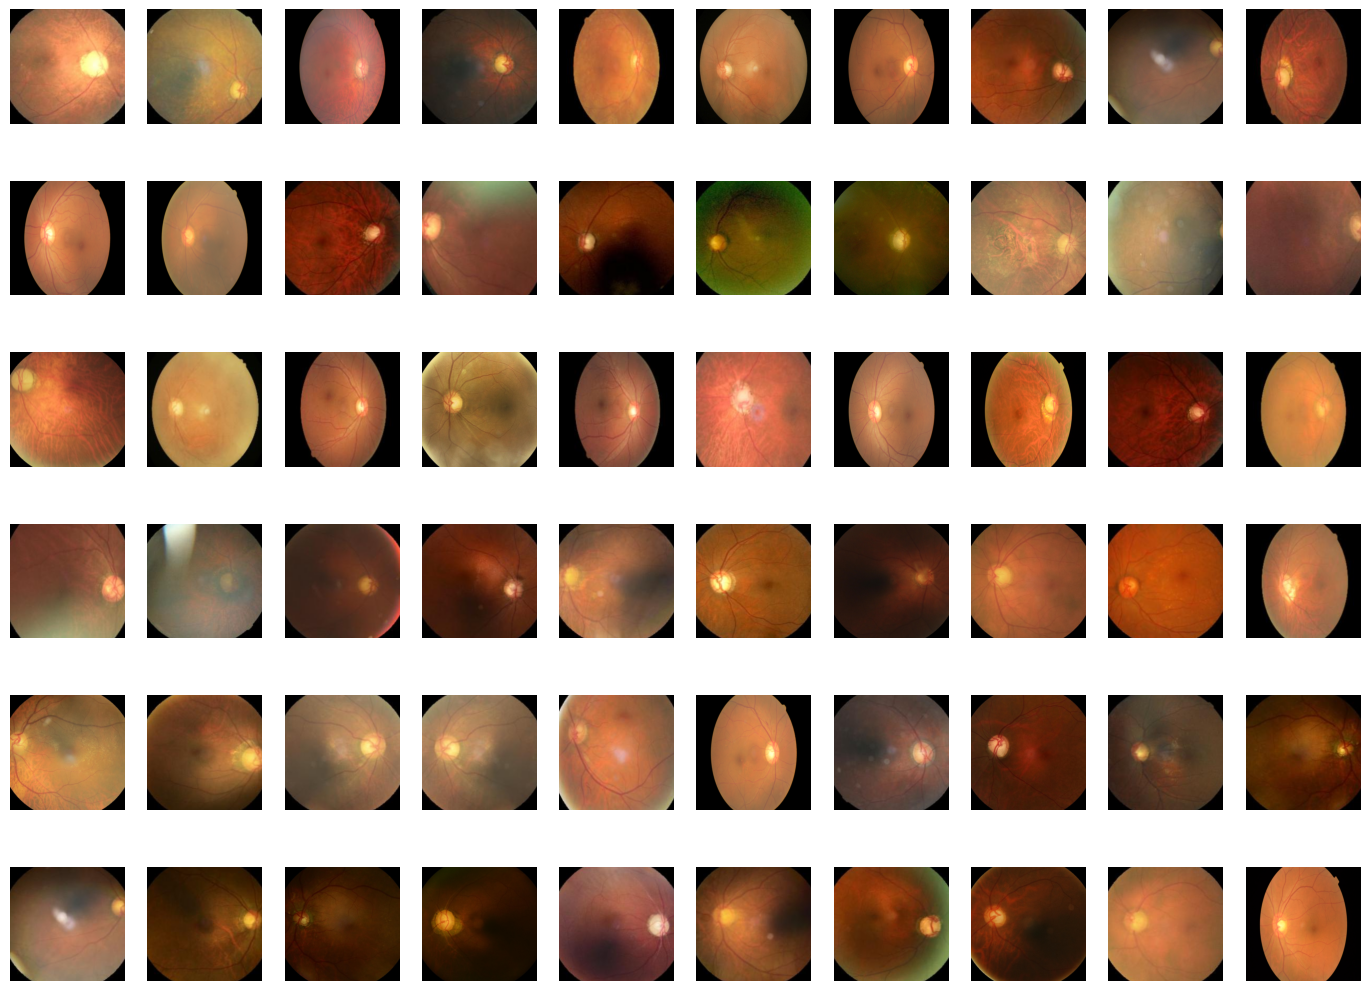

In [70]:
print(len(correct_images))
image_grid(correct_images, 6, 10)
plt.savefig('correct.png')